In [1]:
##### Es necesario montar el drive para poder cargar el dataset
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!git clone https://github.com/Rmejiaz/CrowdLayer

Cloning into 'CrowdLayer'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 71 (delta 7), reused 11 (delta 4), pack-reused 54
Unpacking objects: 100% (71/71), 286.12 KiB | 1006.00 KiB/s, done.


In [3]:
cd CrowdLayer/

/kaggle/working/CrowdLayer


# Import required libraries

In [4]:
import numpy as np
import pandas as pd
import os 
import csv
import tensorflow as tf
import matplotlib.cm as cm
from matplotlib import pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import keras

# packages for learning from crowds
from crowd_layer.crowd_layers import CrowdsClassification, MaskedMultiCrossEntropy
from crowd_layer.crowd_aggregators import CrowdsCategoricalAggregator
import tensorflow_datasets as tfds
import tensorflow as tf

import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D
from keras.utils.vis_utils import plot_model
from tensorflow.keras import regularizers
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras.layers import BatchNormalization

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cv2
import os
import time
import sys

# prevent tensorflow from allocating the entire GPU memory at once
# config = tf.ConfigProto()
# config.gpu_options.allow_growth=True
# sess = tf.Session(config=config)
# seed_value= 43
# from numpy.random import seed
# seed(seed_value)
# tf.random.set_seed(seed_value)

# Data configuration

In [5]:
NUM_RUNS = 30
DATA_PATH_Tr = '/kaggle/input/labelme/LabelMe/train'
DATA_PATH_Te = '/kaggle/input/labelme/LabelMe/test'
DATA_PATH_Val = '/kaggle/input/labelme/LabelMe/valid'
N_CLASSES = 8
BATCH_SIZE = 128
N_EPOCHS = 100
N_ANNOT = 59



# Cargar datos con las etiquetas verdaderas.

In [6]:
Data_train = tf.keras.preprocessing.image_dataset_from_directory(
    directory = DATA_PATH_Tr,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(128, 128),
    shuffle=True,
    validation_split=None,
)

Data_test = tf.keras.preprocessing.image_dataset_from_directory(
    directory = DATA_PATH_Te,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(128, 128),
    shuffle=True,
    validation_split=None,
)

Data_valid = tf.keras.preprocessing.image_dataset_from_directory(
    directory = DATA_PATH_Val,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(128, 128),
    shuffle=True,
    validation_split=None,
)

Found 1000 files belonging to 8 classes.


2022-12-19 21:38:45.056993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 21:38:45.144161: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 21:38:45.144929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 21:38:45.146983: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 1188 files belonging to 8 classes.
Found 500 files belonging to 8 classes.


# Define the base deep learning model


In [7]:
def create_model():

    # base_model = Sequential()


    # base_model.add( Conv2D(32, (3, 3), activation='relu',
    # input_shape=(150, 150, 3)))
    # base_model.add( MaxPooling2D((2, 2)))
    # base_model.add( Dropout(0.2))

    # base_model.add( Conv2D(64, (3, 3), activation='relu'))
    # base_model.add( MaxPooling2D((2, 2)))
    # base_model.add( Dropout(0.2))

    # base_model.add( Conv2D(128, (3, 3), activation='relu'))
    # base_model.add( MaxPooling2D((2, 2)))
    # base_model.add(Dropout(0.2))

    # base_model.add(Conv2D(256, (3, 3), activation='relu'))
    # base_model.add(MaxPooling2D((2, 2)))
    # base_model.add(Dropout(0.2))

    # base_model.add(Flatten())


    # base_model.add(Dense(256, activation='relu'))
    # base_model.add(Dense(1, activation='sigmoid'))

  
    base_model = Sequential()
    base_model.add(BatchNormalization())
    base_model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
    base_model.add(Activation('relu'))
    base_model.add(BatchNormalization())
    base_model.add(MaxPooling2D(pool_size=(2, 2)))
   # base_model.add(Dropout(0.2))
   
    base_model.add(BatchNormalization())
    base_model.add(Conv2D(32, (3, 3)))
    base_model.add(Activation('relu'))
    base_model.add(BatchNormalization())
    base_model.add(MaxPooling2D(pool_size=(2, 2)))
   # base_model.add(Dropout(0.2))
    

    base_model.add(BatchNormalization())
    base_model.add(Conv2D(64, (3, 3)))
    base_model.add(Activation('relu'))
    base_model.add(BatchNormalization())
    base_model.add(MaxPooling2D(pool_size=(2, 2)))
   # base_model.add(Dropout(0.2))

    base_model.add(BatchNormalization())
    base_model.add(Conv2D(64, (3, 3)))
    base_model.add(Activation('relu'))
    base_model.add(BatchNormalization())
    base_model.add(MaxPooling2D(pool_size=(2, 2)))
   # base_model.add(Dropout(0.2))


    base_model.add(Flatten()) 
    base_model.add(BatchNormalization())
    base_model.add(Dense(128))
    base_model.add(Activation('relu'))
    base_model.add(BatchNormalization())
    base_model.add(Dropout(0.2))
    base_model.add(Dense(N_CLASSES))
    base_model.add(Activation('softmax'))

    base_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, clipnorm = 1.0), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return base_model

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50


2022-12-19 21:38:49.330837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-19 21:38:52.622249: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


8/8 - 12s - loss: 1.7600 - accuracy: 0.4640 - val_loss: 3.1606 - val_accuracy: 0.1200
Epoch 2/50
8/8 - 3s - loss: 0.8276 - accuracy: 0.7230 - val_loss: 2.3454 - val_accuracy: 0.1500
Epoch 3/50
8/8 - 2s - loss: 0.4871 - accuracy: 0.8400 - val_loss: 2.0952 - val_accuracy: 0.1660
Epoch 4/50
8/8 - 2s - loss: 0.3307 - accuracy: 0.9040 - val_loss: 2.1690 - val_accuracy: 0.1980
Epoch 5/50
8/8 - 2s - loss: 0.1916 - accuracy: 0.9590 - val_loss: 2.4860 - val_accuracy: 0.1820
Epoch 6/50
8/8 - 2s - loss: 0.1211 - accuracy: 0.9800 - val_loss: 2.6513 - val_accuracy: 0.1840
Epoch 7/50
8/8 - 2s - loss: 0.0812 - accuracy: 0.9900 - val_loss: 2.9010 - val_accuracy: 0.1700
Epoch 8/50
8/8 - 2s - loss: 0.0625 - accuracy: 0.9900 - val_loss: 3.2433 - val_accuracy: 0.1580
Epoch 9/50
8/8 - 2s - loss: 0.0484 - accuracy: 0.9960 - val_loss: 3.3151 - val_accuracy: 0.1540
Epoch 10/50
8/8 - 2s - loss: 0.0363 - accuracy: 0.9970 - val_loss: 3.8774 - val_accuracy: 0.1520
Epoch 11/50
8/8 - 2s - loss: 0.0284 - accuracy: 0

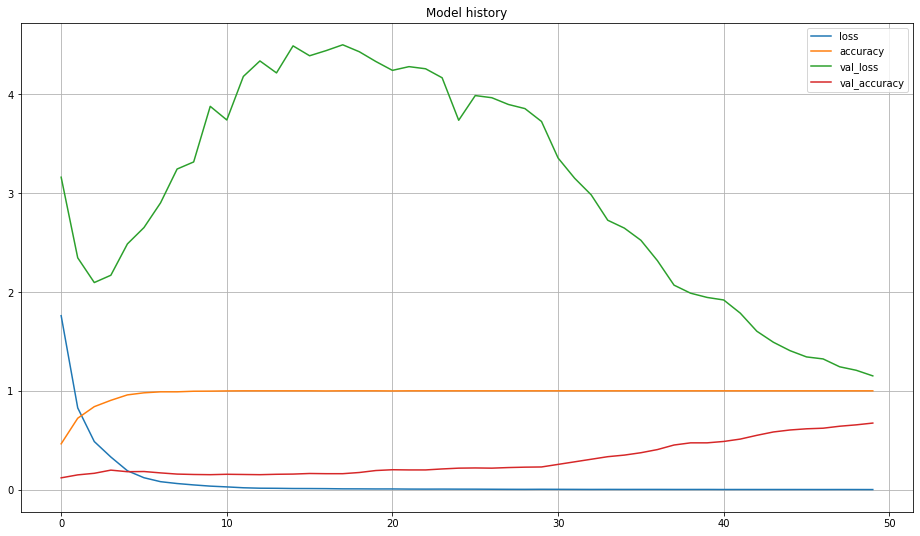

Epoch 1/50
8/8 - 3s - loss: 1.7543 - accuracy: 0.4420 - val_loss: 5.8962 - val_accuracy: 0.1640
Epoch 2/50
8/8 - 2s - loss: 0.8131 - accuracy: 0.7100 - val_loss: 4.1915 - val_accuracy: 0.1620
Epoch 3/50
8/8 - 2s - loss: 0.4900 - accuracy: 0.8470 - val_loss: 2.6437 - val_accuracy: 0.2100
Epoch 4/50
8/8 - 2s - loss: 0.3221 - accuracy: 0.9110 - val_loss: 2.0830 - val_accuracy: 0.2340
Epoch 5/50
8/8 - 2s - loss: 0.2352 - accuracy: 0.9380 - val_loss: 2.0548 - val_accuracy: 0.2620
Epoch 6/50
8/8 - 2s - loss: 0.1495 - accuracy: 0.9740 - val_loss: 2.0719 - val_accuracy: 0.2640
Epoch 7/50
8/8 - 2s - loss: 0.1072 - accuracy: 0.9860 - val_loss: 2.2643 - val_accuracy: 0.2540
Epoch 8/50
8/8 - 2s - loss: 0.0660 - accuracy: 0.9950 - val_loss: 2.4768 - val_accuracy: 0.2480
Epoch 9/50
8/8 - 2s - loss: 0.0471 - accuracy: 0.9980 - val_loss: 2.5680 - val_accuracy: 0.2200
Epoch 10/50
8/8 - 2s - loss: 0.0337 - accuracy: 0.9990 - val_loss: 2.7076 - val_accuracy: 0.2180
Epoch 11/50
8/8 - 2s - loss: 0.0251 - a

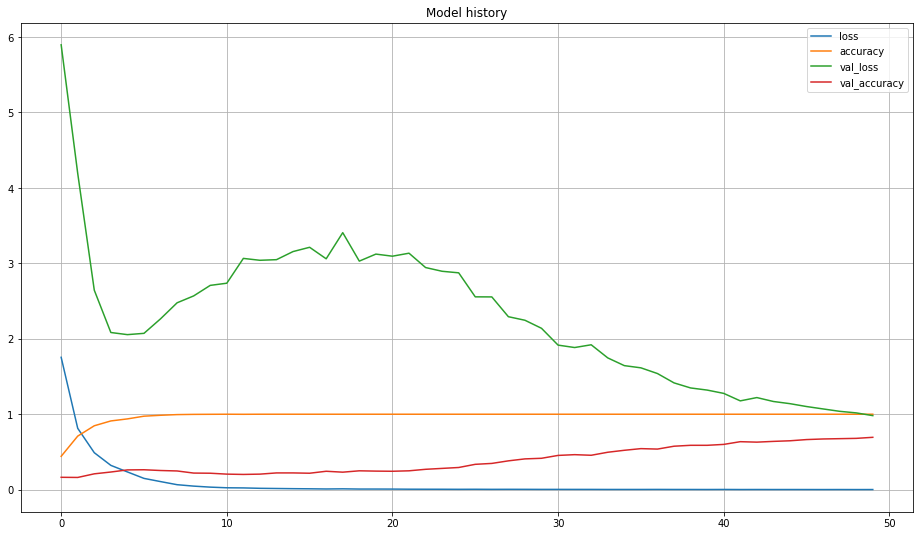

Epoch 1/50
8/8 - 3s - loss: 2.0128 - accuracy: 0.3850 - val_loss: 3.1826 - val_accuracy: 0.2360
Epoch 2/50
8/8 - 2s - loss: 0.7862 - accuracy: 0.7350 - val_loss: 2.4839 - val_accuracy: 0.1860
Epoch 3/50
8/8 - 2s - loss: 0.4779 - accuracy: 0.8400 - val_loss: 2.1101 - val_accuracy: 0.1860
Epoch 4/50
8/8 - 2s - loss: 0.3040 - accuracy: 0.9100 - val_loss: 2.0967 - val_accuracy: 0.2140
Epoch 5/50
8/8 - 2s - loss: 0.2008 - accuracy: 0.9580 - val_loss: 2.3407 - val_accuracy: 0.2240
Epoch 6/50
8/8 - 2s - loss: 0.1491 - accuracy: 0.9620 - val_loss: 2.6207 - val_accuracy: 0.1560
Epoch 7/50
8/8 - 2s - loss: 0.1008 - accuracy: 0.9800 - val_loss: 2.8947 - val_accuracy: 0.1540
Epoch 8/50
8/8 - 2s - loss: 0.0673 - accuracy: 0.9930 - val_loss: 3.1429 - val_accuracy: 0.1540
Epoch 9/50
8/8 - 2s - loss: 0.0396 - accuracy: 1.0000 - val_loss: 3.4743 - val_accuracy: 0.1520
Epoch 10/50
8/8 - 2s - loss: 0.0341 - accuracy: 0.9970 - val_loss: 3.6744 - val_accuracy: 0.1520
Epoch 11/50
8/8 - 2s - loss: 0.0260 - a

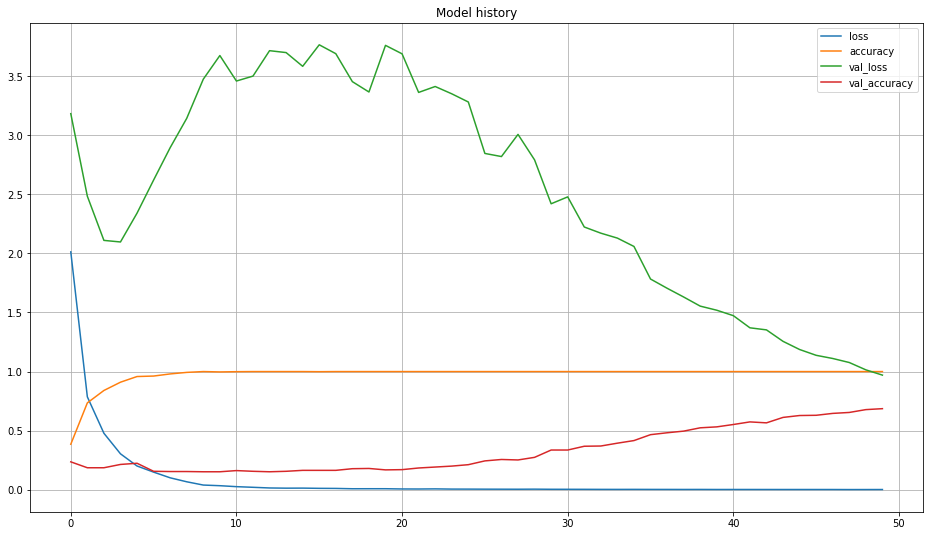

Epoch 1/50
8/8 - 3s - loss: 1.8476 - accuracy: 0.4320 - val_loss: 6.3045 - val_accuracy: 0.1280
Epoch 2/50
8/8 - 2s - loss: 0.8802 - accuracy: 0.7080 - val_loss: 4.7237 - val_accuracy: 0.1240
Epoch 3/50
8/8 - 2s - loss: 0.5274 - accuracy: 0.8230 - val_loss: 2.7490 - val_accuracy: 0.1620
Epoch 4/50
8/8 - 2s - loss: 0.3422 - accuracy: 0.8900 - val_loss: 2.0178 - val_accuracy: 0.2600
Epoch 5/50
8/8 - 2s - loss: 0.2115 - accuracy: 0.9490 - val_loss: 1.9519 - val_accuracy: 0.2140
Epoch 6/50
8/8 - 2s - loss: 0.1498 - accuracy: 0.9710 - val_loss: 1.9804 - val_accuracy: 0.2520
Epoch 7/50
8/8 - 2s - loss: 0.1070 - accuracy: 0.9870 - val_loss: 2.2135 - val_accuracy: 0.2240
Epoch 8/50
8/8 - 2s - loss: 0.0623 - accuracy: 0.9970 - val_loss: 2.3178 - val_accuracy: 0.1960
Epoch 9/50
8/8 - 2s - loss: 0.0458 - accuracy: 0.9990 - val_loss: 2.5129 - val_accuracy: 0.2040
Epoch 10/50
8/8 - 2s - loss: 0.0395 - accuracy: 0.9980 - val_loss: 2.6112 - val_accuracy: 0.1980
Epoch 11/50
8/8 - 2s - loss: 0.0308 - a

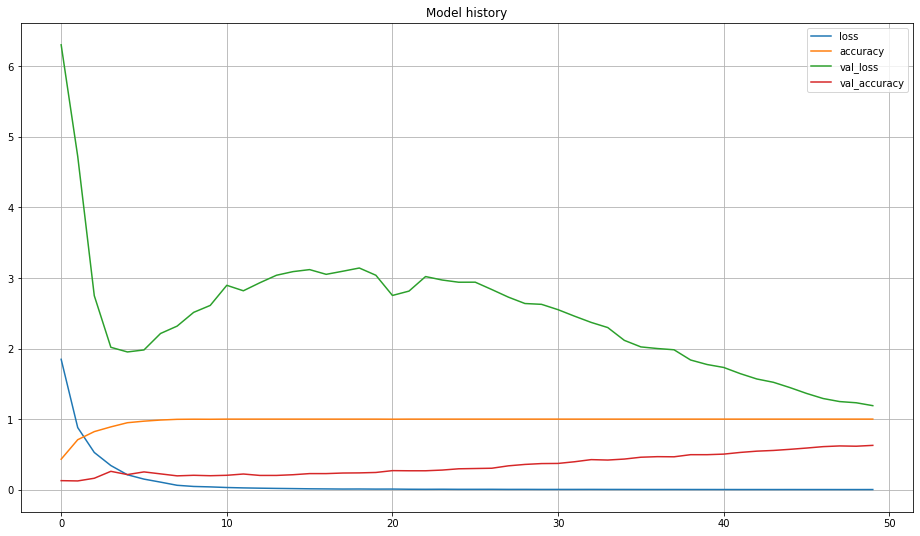

Epoch 1/50
8/8 - 3s - loss: 1.6974 - accuracy: 0.4670 - val_loss: 5.1852 - val_accuracy: 0.1300
Epoch 2/50
8/8 - 2s - loss: 0.7188 - accuracy: 0.7680 - val_loss: 3.7052 - val_accuracy: 0.1540
Epoch 3/50
8/8 - 2s - loss: 0.4414 - accuracy: 0.8560 - val_loss: 2.6132 - val_accuracy: 0.1740
Epoch 4/50
8/8 - 2s - loss: 0.2638 - accuracy: 0.9250 - val_loss: 2.1447 - val_accuracy: 0.2040
Epoch 5/50
8/8 - 2s - loss: 0.1679 - accuracy: 0.9670 - val_loss: 2.3921 - val_accuracy: 0.2300
Epoch 6/50
8/8 - 2s - loss: 0.1119 - accuracy: 0.9790 - val_loss: 2.5883 - val_accuracy: 0.2040
Epoch 7/50
8/8 - 2s - loss: 0.0779 - accuracy: 0.9940 - val_loss: 2.8928 - val_accuracy: 0.2020
Epoch 8/50
8/8 - 2s - loss: 0.0538 - accuracy: 0.9980 - val_loss: 3.0351 - val_accuracy: 0.1980
Epoch 9/50
8/8 - 2s - loss: 0.0369 - accuracy: 1.0000 - val_loss: 3.0839 - val_accuracy: 0.2020
Epoch 10/50
8/8 - 2s - loss: 0.0278 - accuracy: 1.0000 - val_loss: 3.3499 - val_accuracy: 0.1940
Epoch 11/50
8/8 - 2s - loss: 0.0248 - a

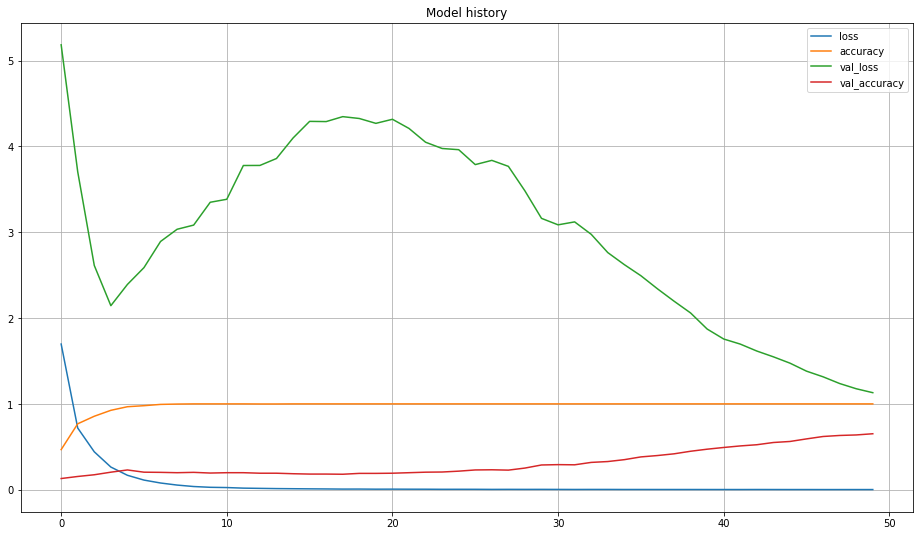

Epoch 1/50
8/8 - 3s - loss: 1.7387 - accuracy: 0.4460 - val_loss: 3.3432 - val_accuracy: 0.2080
Epoch 2/50
8/8 - 2s - loss: 0.7529 - accuracy: 0.7210 - val_loss: 3.1448 - val_accuracy: 0.1540
Epoch 3/50
8/8 - 2s - loss: 0.4318 - accuracy: 0.8570 - val_loss: 2.3121 - val_accuracy: 0.1640
Epoch 4/50
8/8 - 2s - loss: 0.2575 - accuracy: 0.9310 - val_loss: 2.1026 - val_accuracy: 0.2020
Epoch 5/50
8/8 - 2s - loss: 0.1770 - accuracy: 0.9590 - val_loss: 2.4571 - val_accuracy: 0.1900
Epoch 6/50
8/8 - 2s - loss: 0.1131 - accuracy: 0.9800 - val_loss: 3.0341 - val_accuracy: 0.1680
Epoch 7/50
8/8 - 2s - loss: 0.0836 - accuracy: 0.9850 - val_loss: 3.1211 - val_accuracy: 0.1820
Epoch 8/50
8/8 - 2s - loss: 0.0647 - accuracy: 0.9900 - val_loss: 3.6305 - val_accuracy: 0.1700
Epoch 9/50
8/8 - 2s - loss: 0.0557 - accuracy: 0.9950 - val_loss: 4.0425 - val_accuracy: 0.1580
Epoch 10/50
8/8 - 2s - loss: 0.0407 - accuracy: 0.9960 - val_loss: 3.8780 - val_accuracy: 0.1760
Epoch 11/50
8/8 - 2s - loss: 0.0389 - a

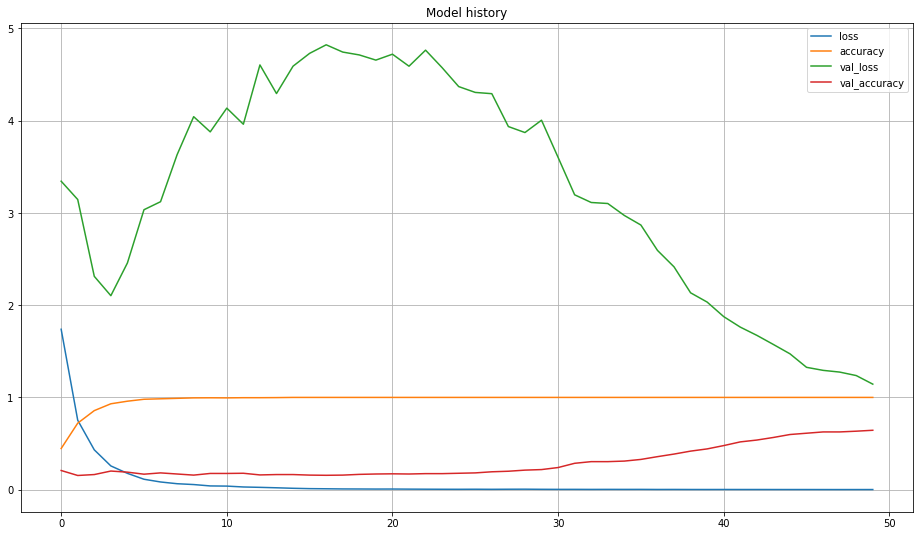

Epoch 1/50
8/8 - 3s - loss: 1.7742 - accuracy: 0.4570 - val_loss: 2.4682 - val_accuracy: 0.1400
Epoch 2/50
8/8 - 2s - loss: 0.7633 - accuracy: 0.7410 - val_loss: 2.2909 - val_accuracy: 0.1620
Epoch 3/50
8/8 - 2s - loss: 0.4569 - accuracy: 0.8610 - val_loss: 2.4088 - val_accuracy: 0.1580
Epoch 4/50
8/8 - 2s - loss: 0.2506 - accuracy: 0.9370 - val_loss: 2.4333 - val_accuracy: 0.1980
Epoch 5/50
8/8 - 2s - loss: 0.1809 - accuracy: 0.9690 - val_loss: 2.5047 - val_accuracy: 0.1880
Epoch 6/50
8/8 - 2s - loss: 0.1148 - accuracy: 0.9850 - val_loss: 2.5366 - val_accuracy: 0.1760
Epoch 7/50
8/8 - 2s - loss: 0.0757 - accuracy: 0.9940 - val_loss: 2.9384 - val_accuracy: 0.1520
Epoch 8/50
8/8 - 2s - loss: 0.0562 - accuracy: 0.9940 - val_loss: 3.0779 - val_accuracy: 0.1520
Epoch 9/50
8/8 - 2s - loss: 0.0369 - accuracy: 1.0000 - val_loss: 3.3184 - val_accuracy: 0.1520
Epoch 10/50
8/8 - 2s - loss: 0.0305 - accuracy: 1.0000 - val_loss: 3.4437 - val_accuracy: 0.1520
Epoch 11/50
8/8 - 2s - loss: 0.0245 - a

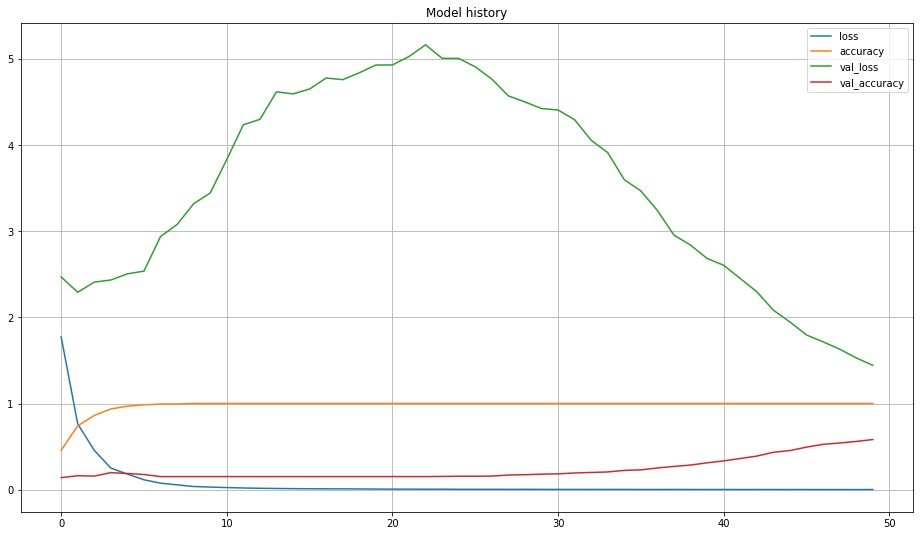

Epoch 1/50
8/8 - 3s - loss: 1.7043 - accuracy: 0.4510 - val_loss: 4.6319 - val_accuracy: 0.1240
Epoch 2/50
8/8 - 2s - loss: 0.7932 - accuracy: 0.7270 - val_loss: 2.0443 - val_accuracy: 0.2100
Epoch 3/50
8/8 - 2s - loss: 0.4892 - accuracy: 0.8450 - val_loss: 1.9298 - val_accuracy: 0.2380
Epoch 4/50
8/8 - 2s - loss: 0.3680 - accuracy: 0.8910 - val_loss: 2.0178 - val_accuracy: 0.2440
Epoch 5/50
8/8 - 2s - loss: 0.2360 - accuracy: 0.9360 - val_loss: 2.3935 - val_accuracy: 0.2280
Epoch 6/50
8/8 - 2s - loss: 0.1510 - accuracy: 0.9680 - val_loss: 2.5057 - val_accuracy: 0.1900
Epoch 7/50
8/8 - 2s - loss: 0.1155 - accuracy: 0.9770 - val_loss: 2.8511 - val_accuracy: 0.1740
Epoch 8/50
8/8 - 2s - loss: 0.0764 - accuracy: 0.9920 - val_loss: 2.9076 - val_accuracy: 0.1660
Epoch 9/50
8/8 - 2s - loss: 0.0575 - accuracy: 0.9930 - val_loss: 3.0136 - val_accuracy: 0.1620
Epoch 10/50
8/8 - 2s - loss: 0.0433 - accuracy: 0.9960 - val_loss: 3.2937 - val_accuracy: 0.1600
Epoch 11/50
8/8 - 2s - loss: 0.0287 - a

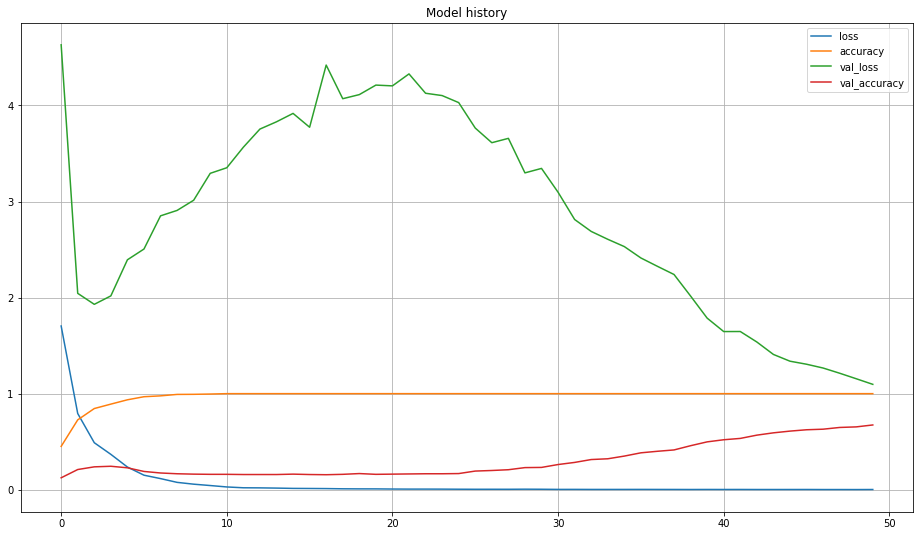

Epoch 1/50
8/8 - 3s - loss: 1.7033 - accuracy: 0.4480 - val_loss: 7.2380 - val_accuracy: 0.1320
Epoch 2/50
8/8 - 2s - loss: 0.7929 - accuracy: 0.7360 - val_loss: 3.2392 - val_accuracy: 0.1300
Epoch 3/50
8/8 - 2s - loss: 0.4820 - accuracy: 0.8380 - val_loss: 2.0596 - val_accuracy: 0.2340
Epoch 4/50
8/8 - 2s - loss: 0.3202 - accuracy: 0.9020 - val_loss: 2.1139 - val_accuracy: 0.2520
Epoch 5/50
8/8 - 2s - loss: 0.1873 - accuracy: 0.9590 - val_loss: 2.3456 - val_accuracy: 0.2260
Epoch 6/50
8/8 - 2s - loss: 0.1249 - accuracy: 0.9770 - val_loss: 2.3450 - val_accuracy: 0.2280
Epoch 7/50
8/8 - 2s - loss: 0.0888 - accuracy: 0.9940 - val_loss: 2.6903 - val_accuracy: 0.2180
Epoch 8/50
8/8 - 2s - loss: 0.0654 - accuracy: 0.9910 - val_loss: 2.5362 - val_accuracy: 0.2260
Epoch 9/50
8/8 - 2s - loss: 0.0515 - accuracy: 0.9960 - val_loss: 2.8635 - val_accuracy: 0.1940
Epoch 10/50
8/8 - 2s - loss: 0.0356 - accuracy: 0.9980 - val_loss: 2.8701 - val_accuracy: 0.1740
Epoch 11/50
8/8 - 2s - loss: 0.0278 - a

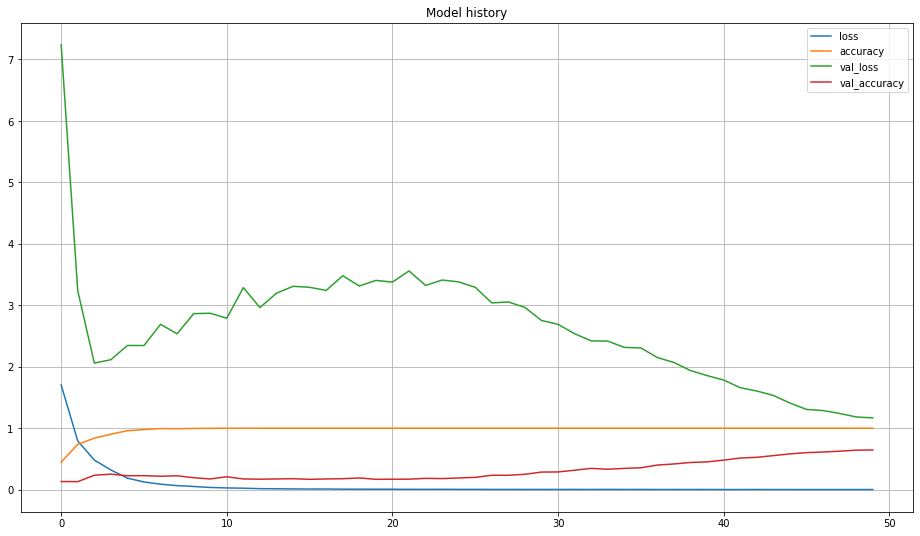

Epoch 1/50
8/8 - 3s - loss: 1.8038 - accuracy: 0.4190 - val_loss: 7.1188 - val_accuracy: 0.1660
Epoch 2/50
8/8 - 2s - loss: 0.8467 - accuracy: 0.7230 - val_loss: 5.3806 - val_accuracy: 0.1800
Epoch 3/50
8/8 - 2s - loss: 0.5145 - accuracy: 0.8260 - val_loss: 2.9213 - val_accuracy: 0.1700
Epoch 4/50
8/8 - 2s - loss: 0.3038 - accuracy: 0.9160 - val_loss: 2.4484 - val_accuracy: 0.1540
Epoch 5/50
8/8 - 2s - loss: 0.2007 - accuracy: 0.9500 - val_loss: 2.0989 - val_accuracy: 0.2000
Epoch 6/50
8/8 - 2s - loss: 0.1356 - accuracy: 0.9790 - val_loss: 2.2199 - val_accuracy: 0.2180
Epoch 7/50
8/8 - 2s - loss: 0.0913 - accuracy: 0.9840 - val_loss: 2.3592 - val_accuracy: 0.1840
Epoch 8/50
8/8 - 2s - loss: 0.0663 - accuracy: 0.9950 - val_loss: 2.4448 - val_accuracy: 0.1780
Epoch 9/50
8/8 - 2s - loss: 0.0410 - accuracy: 1.0000 - val_loss: 2.7290 - val_accuracy: 0.1700
Epoch 10/50
8/8 - 2s - loss: 0.0349 - accuracy: 0.9990 - val_loss: 2.5375 - val_accuracy: 0.1820
Epoch 11/50
8/8 - 2s - loss: 0.0333 - a

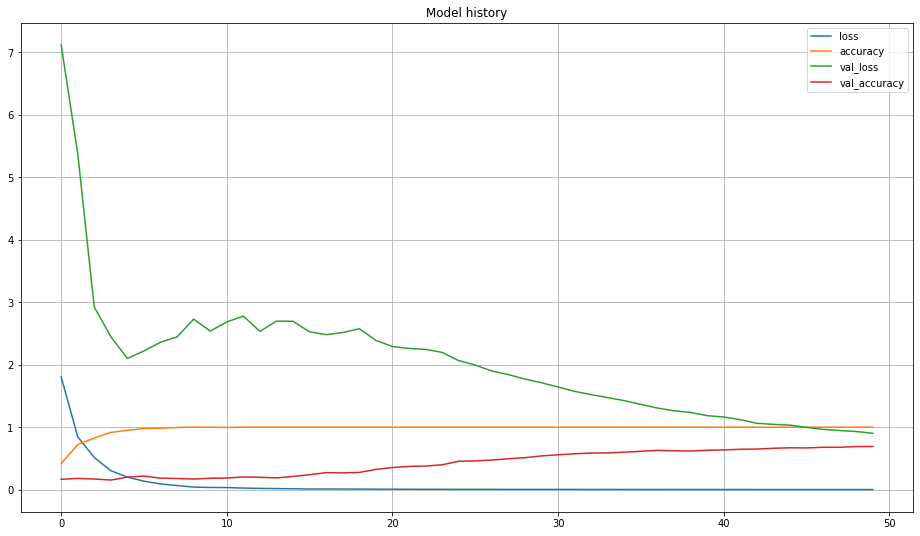

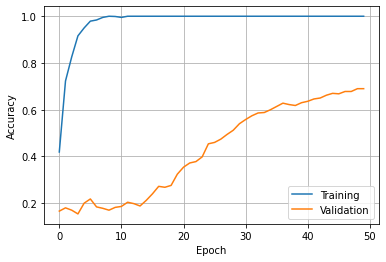

In [8]:
NUM_RUNS = 10
N_EPOCHS = 50


    # Create the results directory
# if  not 'results' in os.listdir():
#     os.mkdir('/kaggle/working/results')
AUC = np.zeros(NUM_RUNS)
val_acc_goldst = np.zeros(NUM_RUNS)

for i in range(NUM_RUNS):
    model = create_model()
    model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam(lr=1e-3))
    trainHistory = model.fit(Data_train,validation_data=Data_valid, epochs=N_EPOCHS, verbose=2)
    (loss, accuracy) = model.evaluate(Data_test)
    val_acc_goldst[i] = accuracy


    # Create the history figure
    plt.figure(figsize=(16,9))
    for l in  trainHistory.history:
        plt.plot( trainHistory.history[l],label=l)
    plt.title('Model history')
    plt.legend()
    plt.grid()

   
    
     #AUC

    val_AUC_metric = tf.keras.metrics.AUC(num_thresholds=3, from_logits = True)
    for x_batch_val, y_batch_val in Data_test:
        val_logits = model(x_batch_val.numpy(), training=False)
      # tf.print(y_batch_val)
        val_AUC_metric.update_state(y_batch_val, val_logits.numpy().argmax(axis=1).astype('float'))

    val_AUC = val_AUC_metric.result()
    val_AUC_metric.reset_states()
    val_AUC = val_AUC.numpy()
    print("Validation AUC: %.4f" % (float(val_AUC),))
    AUC[i] = val_AUC

     # Save the figure
    i = 0
    flag = True
    while(flag==True):
        if (f'history{i}' in os.listdir('/kaggle/working')):
            i+=1
        else:
            plt.savefig(f'/kaggle/working/history{i}')
            flag=False

    plt.show()
df_gold = pd.DataFrame(val_acc_goldst)
df_gold.to_csv('/kaggle/working/labelme_GOLD.csv',index=False) # save to notebook output
  

plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()

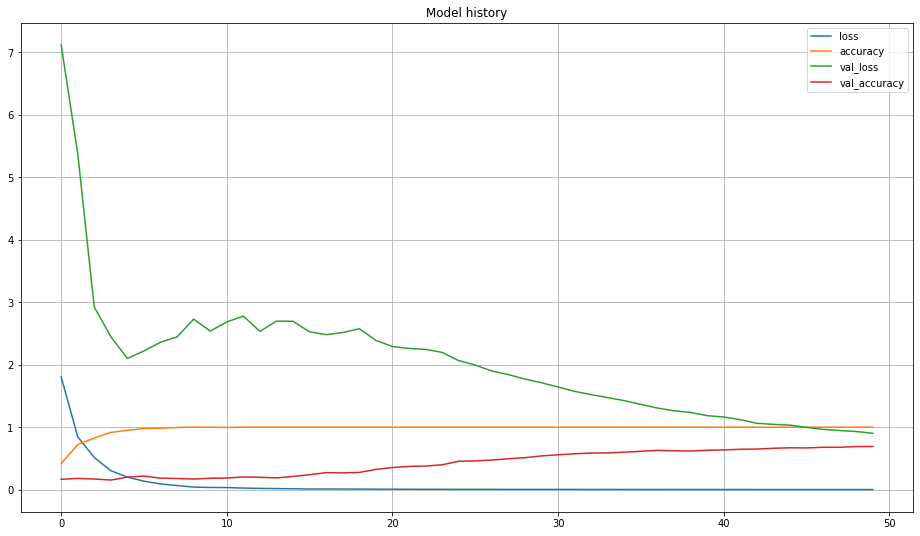

In [9]:
# Create the results directory
if  not 'results' in os.listdir():
    os.mkdir('results')

# Create the history figure
plt.figure(figsize=(16,9))
for i in trainHistory.history:
    plt.plot(trainHistory.history[i],label=i)
plt.title('Model history')
plt.legend()
plt.grid()

In [10]:
val_acc_goldst

array([0.69696969, 0.72053874, 0.69528621, 0.68602693, 0.70202023,
       0.68771046, 0.60269362, 0.69949496, 0.66582489, 0.72558922])

In [11]:
 
AUC
     

array([0.87973028, 0.87934488, 0.89541429, 0.86851645, 0.89630055,
       0.87258184, 0.83456647, 0.88996148, 0.89269751, 0.89809245])

In [12]:

print('Average Accuracy: ', np.round(val_acc_goldst.mean(),4)*100) 
print('Average std: ',np.round(np.std(val_acc_goldst),4)*100)

Average Accuracy:  68.82000000000001
Average std:  3.27


In [13]:
print('Average Accuracy: ', np.round( AUC.mean(),4)*100) 
print('Average std: ',np.round(np.std( AUC),4)*100)

     

Average Accuracy:  88.07000000000001
Average std:  1.83


# Cargar datos con múltiples anotadores

In [14]:
# with open('../drive/Shareddrives/Multiple Anotators/CrowdLayer/Data/LabelMe/filenames_train.txt', 'r') as file:
#     reader = csv.reader(file)
#     Names = []
#     for row in reader:
#         Names.append(row[0])

# with open('../drive/Shareddrives/Multiple Anotators/CrowdLayer/Data/LabelMe/labels_train.txt', 'r') as file:
#     reader = csv.reader(file)
#     y_ = []
#     for row in reader:
#         y_.append(row[0])


# Data = pd.read_csv('../drive/Shareddrives/Multiple Anotators/CrowdLayer/Data/LabelMe/answers.txt', sep=" ", header=None)
# A_ = Data.loc[:,Data.sum() > -990]
# Y_ = A_.values

# # with open('../drive/Shareddrives/Multiple Anotators/CrowdLayer/Data/LabelMe/prepared/answers.npy', mode = 'rb') as file:
# #     Y_ = np.load(file)

# # with open('../drive/Shareddrives/Multiple Anotators/CrowdLayer/Data/LabelMe/prepared/labels_train.npy', mode = 'rb') as file:
# #     y_ = np.load(file)

# A = os.walk(DATA_PATH_Tr)
# Y = []
# y = []
# for r,d,files in A:
#   d.sort()
#   if len(files) != 0:
#     print(files)
#     for fil_ in sorted(files):
#       Y.append(Y_[Names.index(fil_),:])
#       y.append(int(y_[Names.index(fil_)]))

In [15]:
# Data_train_MA = tf.keras.preprocessing.image_dataset_from_directory(
#     directory = DATA_PATH_Tr,
#     labels=Y,
#     label_mode="int",
#     color_mode="rgb",
#     batch_size=BATCH_SIZE,
#     image_size=(128, 128),
#     shuffle=True,
#     validation_split=None,
# )

In [16]:
# with open('../drive/Shareddrives/Multiple Anotators/CrowdLayer/Data/LabelMe/labels_test.txt', 'r') as file:
#     reader = csv.reader(file)
#     y_te = []
#     for row in reader:
#         y_te.append(row[0])

# with open('../drive/Shareddrives/Multiple Anotators/CrowdLayer/Data/LabelMe/filenames_test.txt', 'r') as file:
#     reader = csv.reader(file)
#     Names = []
#     for row in reader:
#         Names.append(row[0])

# A = os.walk(DATA_PATH_Te)
# y_test = []
# for r,d,files in A:
#   d.sort()
#   if len(files) != 0:
#     print(files)
#     for fil_ in sorted(files):
#       y_test.append(int(y_te[Names.index(fil_)]))

In [17]:
# Data_test_MA = tf.keras.preprocessing.image_dataset_from_directory(
#     directory = DATA_PATH_Te,
#     labels=y_test,
#     label_mode="int",
#     color_mode="rgb",
#     batch_size=BATCH_SIZE,
#     image_size=(128, 128),
#     shuffle=True,
#     validation_split=None,
# )

# Auxiliary function for evaluating the models

In [18]:
# def eval_model(model, test_data, test_labels):
#     # testset accuracy
#     preds_test = model.predict(test_data)
#     preds_test_num = np.argmax(preds_test, axis=1)
#     accuracy_test = 1.0*np.sum(preds_test_num == test_labels) / len(test_labels)

#     return accuracy_test

# Proposed Model

In [19]:
# import sys
# sys.path.append("/content/drive/Shareddrives/Multiple Anotators/CrowdLayer/Models")
# from Multiple_Annotators_C_v1 import MultipleAnnotators_Classification

In [20]:
# MA = MultipleAnnotators_Classification(N_CLASSES, N_ANNOT)
# def create_model():
#   base_model = tf.keras.applications.VGG16(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(128, 128, 3),
#   )
#   base_model.trainable = False
#   inputs = keras.Input(shape=(128, 128, 3))
#   x = base_model(inputs)
#   x = keras.layers.Flatten()(x)
#   x = keras.layers.Dropout(0.5)(x)
#   x = keras.layers.Dense(256)(x)
#   x = keras.layers.BatchNormalization()(x)
#   x = keras.layers.Dropout(0.5)(x)
#   output = MA.CrowdLayer(x)
#   model = keras.Model(inputs=inputs,outputs=output)
#   return model

In [21]:

# val_acc = np.zeros(NUM_RUNS)
# for i in range(NUM_RUNS):
#   MA = MultipleAnnotators_Classification(N_CLASSES, N_ANNOT)
#   model = create_model()
#   model = MA.fit(model, Data_train_MA, N_EPOCHS)
#   val_acc[i] = MA.eval_model(Data_test_MA)
#   print("Validation acc: %.4f" % (float(val_acc[i]),))

In [22]:
# print(val_acc)

In [23]:
# r1 = np.mean(val_acc)
# print("\nMean: ", r1)
  
# r2 = np.std(val_acc)
# print("\nstd: ", r2)
  
# r3 = np.var(val_acc)
# print("\nvariance: ", r3)

In [24]:

# plt.plot(val_acc, range(NUM_RUNS))
# #plt.plot(h.history['val_accuracy'])
# plt.title('Model MA accuracy',fontsize=14, fontweight='bold')
# plt.ylabel('Accuracy',fontsize=14, fontweight='bold')
# #plt.xlabel('Epoch',fontsize=14, fontweight='bold')
# plt.legend(['Test'], loc='upper left')
# #plt.ylim(0.7, 1.0)
# plt.grid()
# plt.show()
